In [1]:
# Setup Environment
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Execute the following two lines if 00_startup.py initialization file isn't present or can't be created 
# from jupyterthemes import jtplot
# jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
sns.set_style('darkgrid')
sns.set_context('talk')

In [2]:
# Read-in data
df = pd.read_csv('https://raw.githubusercontent.com/aprescot1977/Thinkful/master/no2_master.csv')
df.rename(columns={'Daily Max 1-hour NO2 Concentration':'Daily Max 1-hr [NO2] in ppb'}, inplace=True)
pollutant_no2 = 'Daily Max 1-hr [NO2] in ppb'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 22 columns):
Date                           4056 non-null object
Source                         4056 non-null object
Site ID                        4056 non-null int64
POC                            4056 non-null int64
Daily Max 1-hr [NO2] in ppb    4056 non-null float64
UNITS                          4056 non-null object
DAILY_AQI_VALUE                4056 non-null int64
Site Name                      4056 non-null object
DAILY_OBS_COUNT                4056 non-null int64
PERCENT_COMPLETE               4056 non-null float64
AQS_PARAMETER_CODE             4056 non-null int64
AQS_PARAMETER_DESC             4056 non-null object
CBSA_CODE                      4056 non-null int64
CBSA_NAME                      4056 non-null object
STATE_CODE                     4056 non-null int64
STATE                          4056 non-null object
COUNTY_CODE                    4056 non-null int64
COUNTY         

#### Hypothesis 1: Salt Lake City NO2 over 20 year period (1999 - 2019 in 5 year increments)

,Date,Source,Site ID,POC,Daily Max 1-hr [NO2] in ppb,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,site
year,,,,,,,,,,,,,,,,,,,,,
1999,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
2004,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
2009,362,362,362,362,362,362,362,362,362,362,...,362,362,362,362,362,362,362,362,362,362
2014,334,334,334,334,334,334,334,334,334,334,...,334,334,334,334,334,334,334,334,334,334
2018,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,347
2019,362,362,362,362,362,362,362,362,362,362,...,362,362,362,362,362,362,362,362,362,362


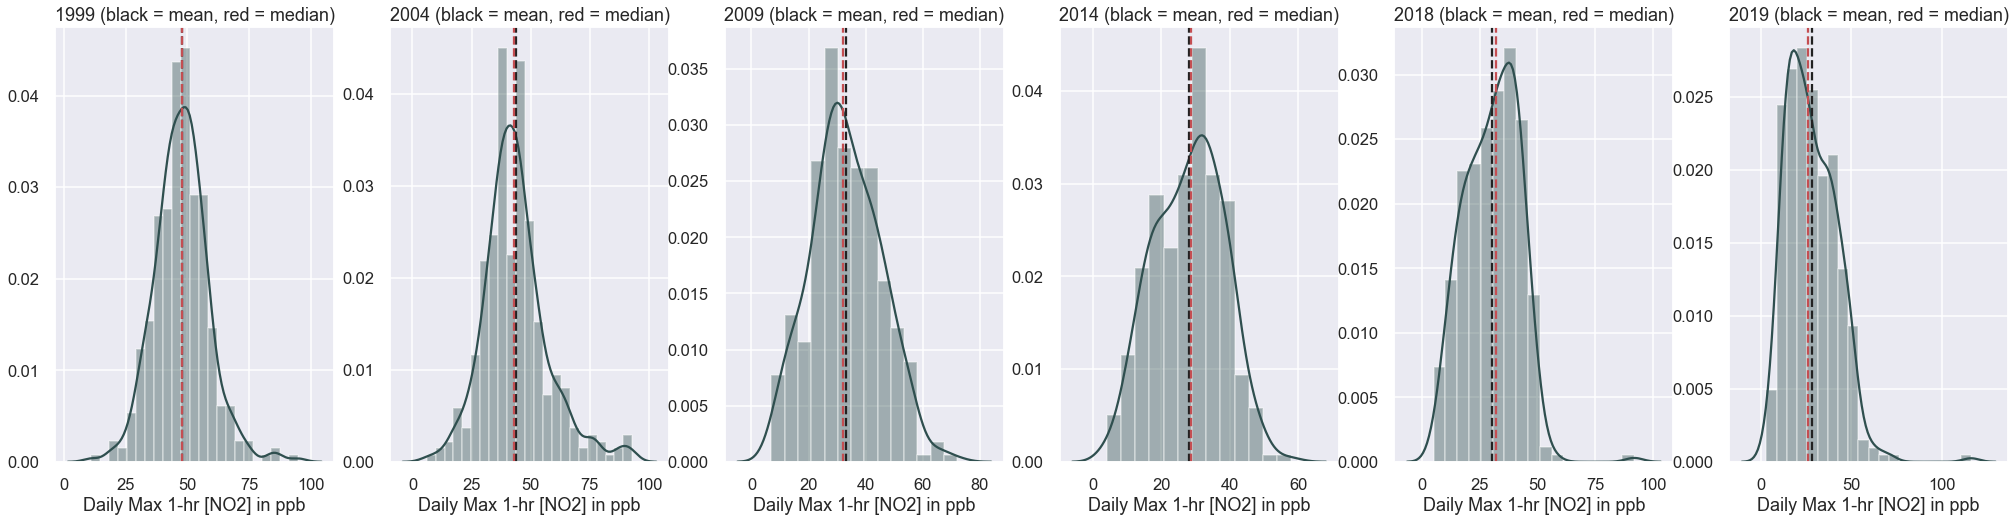

In [3]:
# Visualize distributions for SLC
years = list(df['year'].unique())

ii = 0
fig, axes = plt.subplots(1,len(years), figsize=(35, 8))
while ii<len(years):
    ax = sns.distplot(df[(df['year']==years[ii])&(df['site']=='SLC')][pollutant_no2], ax=axes[ii], color = 'darkslategrey')
    ax.axvline(df[(df['year']==years[ii])&(df['site']=='SLC')][pollutant_no2].mean(), color = 'k', linestyle='dashed')
    ax.axvline(df[(df['year']==years[ii])&(df['site']=='SLC')][pollutant_no2].median(), color = 'r', linestyle='dashed')
    ax.set_title('%s (black = mean, red = median)' % str(years[ii]))
    ii +=1

df[df['site']=='SLC'].groupby(['year']).agg('count')

In [4]:
# Check normality for SLC distributions
[print('{} statistics: {}'.format(ii, stats.describe(df[(df['year']==ii)&(df['site']=='SLC')][pollutant_no2]))) for ii in years];
[print('{} Shapiro-Wilk: {}'.format(ii,  stats.shapiro(df[(df['year']==ii)&(df['site']=='SLC')][pollutant_no2]))) for ii in years];

1999 statistics: DescribeResult(nobs=357, minmax=(11.0, 95.0), mean=47.714285714285715, variance=119.42375601926165, skewness=0.3934630781729708, kurtosis=1.6585751668557407)
2004 statistics: DescribeResult(nobs=364, minmax=(6.0, 93.0), mean=43.68131868131868, variance=186.68604123149578, skewness=0.805983516502759, kurtosis=1.669594131337191)
2009 statistics: DescribeResult(nobs=362, minmax=(7.0, 72.0), mean=33.14088397790055, variance=147.98840697265118, skewness=0.1883842251664429, kurtosis=-0.2537685006295156)
2014 statistics: DescribeResult(nobs=334, minmax=(4.0, 58.0), mean=28.005988023952096, variance=103.29125532718346, skewness=-0.05087482893585582, kurtosis=-0.5666284569097804)
2018 statistics: DescribeResult(nobs=347, minmax=(5.0, 92.0), mean=30.429394812680115, variance=134.9451450084123, skewness=0.22749814378929376, kurtosis=1.096815090643771)
2019 statistics: DescribeResult(nobs=362, minmax=(3.0, 116.0), mean=28.050552486187843, variance=190.59840689612955, skewness=1.06

In [5]:
# Kruskal-Wallis and One Way ANOVA (Discuss with Mukesh) for SLC
print(stats.kruskal(df[(df['year']==1999)&(df['site']=='SLC')][pollutant_no2],
                    df[(df['year']==2004)&(df['site']=='SLC')][pollutant_no2], 
                    df[(df['year']==2009)&(df['site']=='SLC')][pollutant_no2], 
                    df[(df['year']==2014)&(df['site']=='SLC')][pollutant_no2],
                    df[(df['year']==2018)&(df['site']=='SLC')][pollutant_no2]))

print(stats.f_oneway(df[(df['year']==1999)&(df['site']=='SLC')][pollutant_no2],
                    df[(df['year']==2004)&(df['site']=='SLC')][pollutant_no2], 
                    df[(df['year']==2009)&(df['site']=='SLC')][pollutant_no2], 
                    df[(df['year']==2014)&(df['site']=='SLC')][pollutant_no2],
                    df[(df['year']==2018)&(df['site']=='SLC')][pollutant_no2]))

[print('{} SLC NO2 median: {}'.format(ii, df[(df['year']==ii)&(df['site']=='SLC')][pollutant_no2].median())) for ii in years];

KruskalResult(statistic=569.2036089350329, pvalue=7.157604989671709e-122)
F_onewayResult(statistic=187.76046740432682, pvalue=4.1092490826716217e-134)
1999 SLC NO2 median: 48.0
2004 SLC NO2 median: 43.0
2009 SLC NO2 median: 32.0
2014 SLC NO2 median: 28.5
2018 SLC NO2 median: 32.0
2019 SLC NO2 median: 26.0


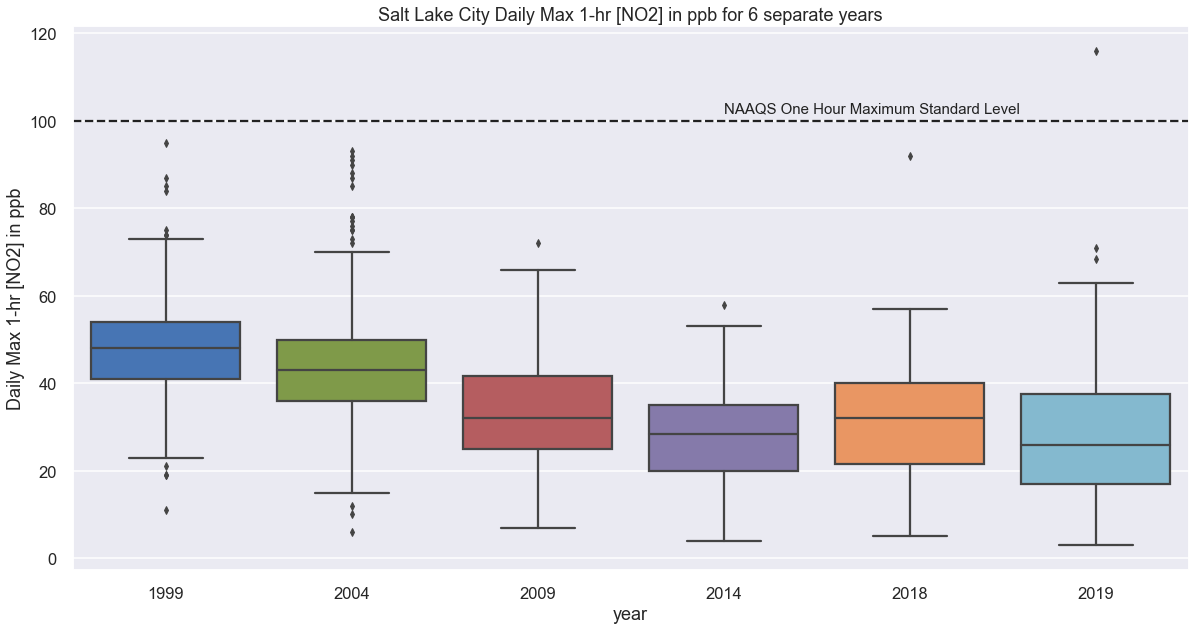

In [6]:
# Plot NO2 time course for SLC (1999-2019)
fig, axes = plt.subplots(1,1,figsize = (20, 10))
ax = sns.boxplot(y = pollutant_no2, x = 'year', data = df[df['site']=='SLC'])
ax.axhline(100, color = 'k', linestyle='dashed');
ax.set_title('Salt Lake City ' + pollutant_no2 + ' for 6 separate years');
style = dict(size=15, color='k');
ax.text(3, 102, "NAAQS One Hour Maximum Standard Level", **style);

#### Hypothesis 2: Honolulu NO2 over 20 year period (1999 - 2019 in 5 year increments)

,Date,Source,Site ID,POC,Daily Max 1-hr [NO2] in ppb,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,site
year,,,,,,,,,,,,,,,,,,,,,
1999,348,348,348,348,348,348,348,348,348,348,...,348,348,348,348,348,348,348,348,348,348
2004,325,325,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
2009,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
2014,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,289,289,289
2018,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,347
2019,264,264,264,264,264,264,264,264,264,264,...,264,264,264,264,264,264,264,264,264,264


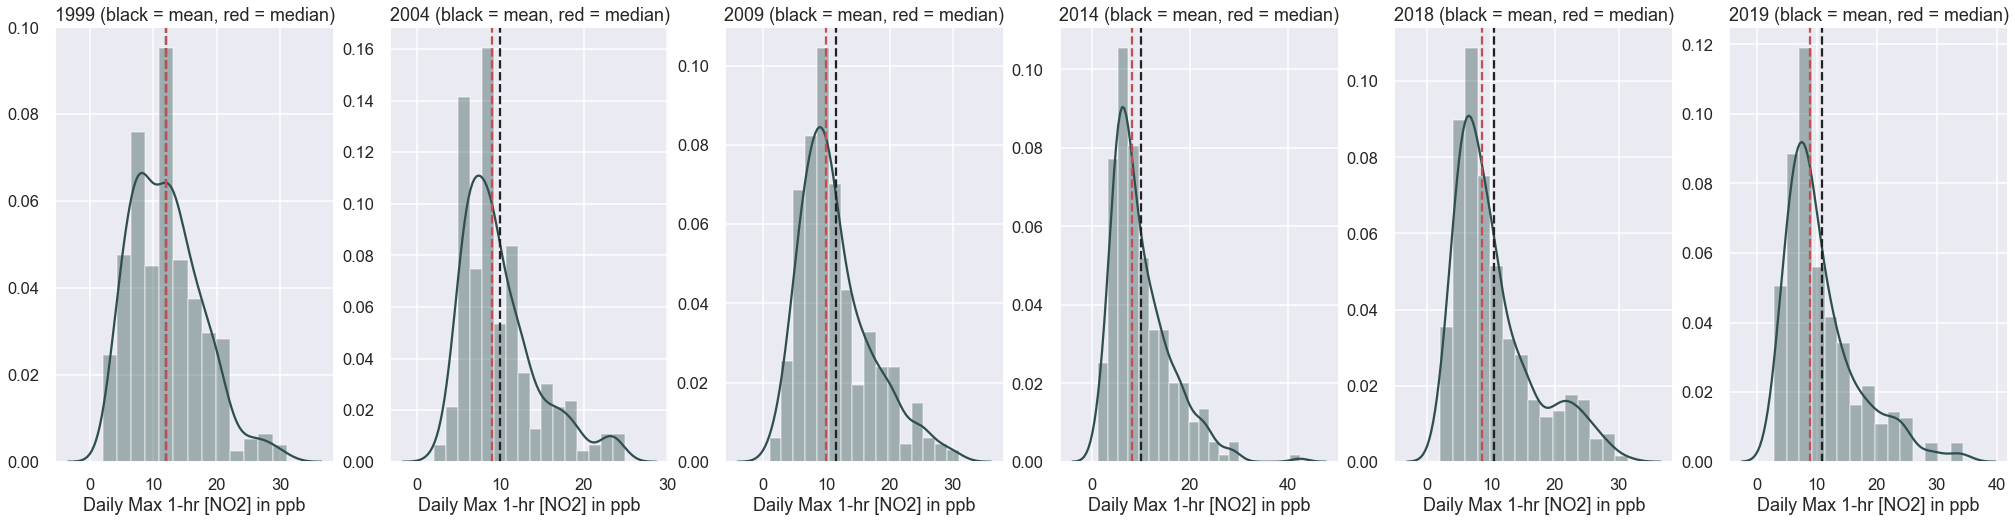

In [7]:
# Visualize distributions for HON
years = list(df['year'].unique())

ii = 0
fig, axes = plt.subplots(1,len(years), figsize=(35, 8))
while ii<len(years):
    ax = sns.distplot(df[(df['year']==years[ii])&(df['site']=='HON')][pollutant_no2], ax=axes[ii], color = 'darkslategrey')
    ax.axvline(df[(df['year']==years[ii])&(df['site']=='HON')][pollutant_no2].mean(), color = 'k', linestyle='dashed')
    ax.axvline(df[(df['year']==years[ii])&(df['site']=='HON')][pollutant_no2].median(), color = 'r', linestyle='dashed')
    ax.set_title('%s (black = mean, red = median)' % str(years[ii]))
    ii +=1

df[df['site']=='HON'].groupby(['year']).agg('count')

In [8]:
# Check normality for HON distributions
[print('{} statistics: {}'.format(ii, stats.describe(df[(df['year']==ii)&(df['site']=='HON')][pollutant_no2]))) for ii in years];
[print('{} Shapiro-Wilk: {}'.format(ii,  stats.shapiro(df[(df['year']==ii)&(df['site']=='HON')][pollutant_no2]))) for ii in years];

1999 statistics: DescribeResult(nobs=348, minmax=(2.0, 31.0), mean=12.054597701149426, variance=30.956664679187785, skewness=0.7184113757985557, kurtosis=0.31753425879616026)
2004 statistics: DescribeResult(nobs=325, minmax=(2.0, 25.0), mean=9.923076923076923, variance=20.966286799620132, skewness=1.1951218513073836, kurtosis=1.127257073177005)
2009 statistics: DescribeResult(nobs=357, minmax=(1.0, 31.0), mean=11.448179271708684, variance=32.832278979007334, skewness=0.9905367290329014, kurtosis=0.6975750808342567)
2014 statistics: DescribeResult(nobs=289, minmax=(1.2, 42.5), mean=9.901038062283737, variance=35.94718641868511, skewness=1.4473687487071385, kurtosis=3.048862287288686)
2018 statistics: DescribeResult(nobs=347, minmax=(2.0, 31.4), mean=10.406051873198846, variance=38.90398061001816, skewness=1.1903303386198612, kurtosis=0.6783362457682225)
2019 statistics: DescribeResult(nobs=264, minmax=(2.9, 34.4), mean=10.782575757575758, variance=37.73657737066483, skewness=1.418170304

In [9]:
# Kruskal-Wallis and One Way ANOVA (Discuss with Mukesh) for HON
print(stats.kruskal(df[(df['year']==1999)&(df['site']=='HON')][pollutant_no2],
                    df[(df['year']==2004)&(df['site']=='HON')][pollutant_no2], 
                    df[(df['year']==2009)&(df['site']=='HON')][pollutant_no2], 
                    df[(df['year']==2014)&(df['site']=='HON')][pollutant_no2],
                    df[(df['year']==2018)&(df['site']=='HON')][pollutant_no2]))
print(stats.f_oneway(df[(df['year']==1999)&(df['site']=='HON')][pollutant_no2],
                    df[(df['year']==2004)&(df['site']=='HON')][pollutant_no2], 
                    df[(df['year']==2009)&(df['site']=='HON')][pollutant_no2], 
                    df[(df['year']==2014)&(df['site']=='HON')][pollutant_no2],
                    df[(df['year']==2018)&(df['site']=='HON')][pollutant_no2]))
[print('{} HON NO2 median: {}'.format(ii, df[(df['year']==ii)&(df['site']=='HON')][pollutant_no2].median())) for ii in years];

KruskalResult(statistic=55.30115997216886, pvalue=2.8095651588992548e-11)
F_onewayResult(statistic=9.669085105357349, pvalue=9.92290281274598e-08)
1999 HON NO2 median: 12.0
2004 HON NO2 median: 9.0
2009 HON NO2 median: 10.0
2014 HON NO2 median: 8.2
2018 HON NO2 median: 8.5
2019 HON NO2 median: 8.8


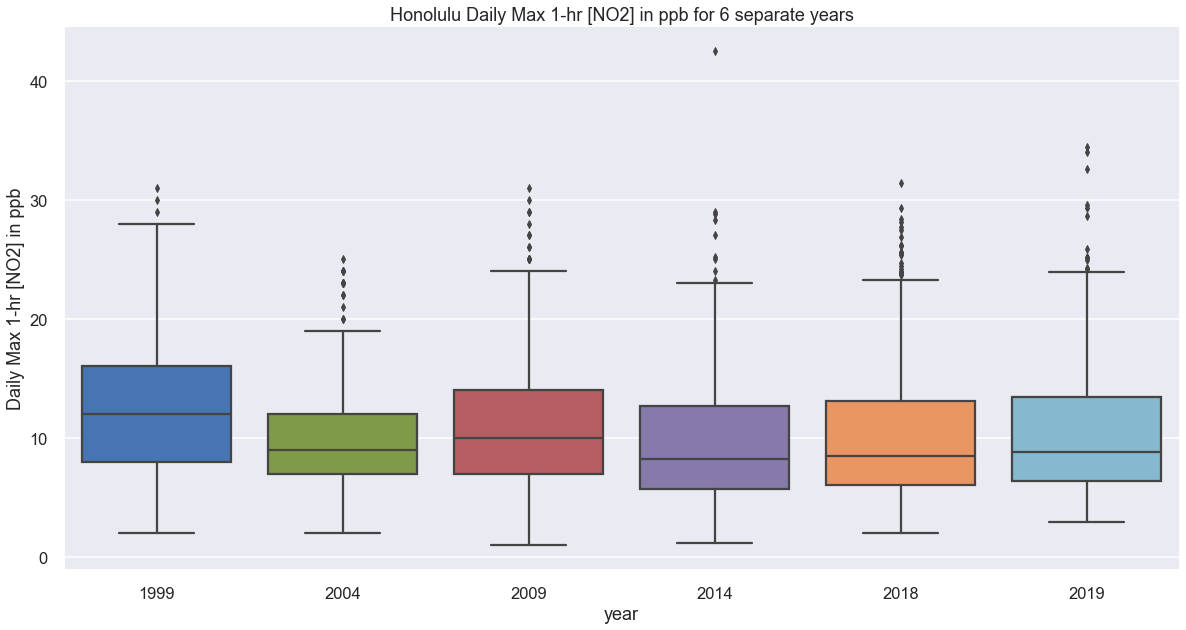

In [10]:
# Plot NO2 time course for HON (1999-2019)
fig, axes = plt.subplots(1,1,figsize = (20, 10))
ax = sns.boxplot(y = pollutant_no2, x = 'year', data = df[df['site']=='HON'])
ax.set_title('Honolulu ' + pollutant_no2 + ' for 6 separate years');

#### Hypothesis 3: Salt Lake City versus Honolulu NO2 levels over a 20 year period (1999 to 2019 in 5 year increments)

In [11]:
# Annual statistics to compare SLC versus HON NO2 levels
[print('{} SLC v HON statistics: {}'.format(ii, stats.kruskal(df[(df['year']==ii)&(df['site']=='SLC')][pollutant_no2], df[(df['year']==ii)&(df['site']=='HON')][pollutant_no2]))) for ii in years];

1999 SLC v HON statistics: KruskalResult(statistic=522.2162219523813, pvalue=1.3943615935191963e-115)
2004 SLC v HON statistics: KruskalResult(statistic=501.8544504814011, pvalue=3.7538834102942335e-111)
2009 SLC v HON statistics: KruskalResult(statistic=434.3731785107087, pvalue=1.8158383137038618e-96)
2014 SLC v HON statistics: KruskalResult(statistic=349.79470960691776, pvalue=4.697259287196978e-78)
2018 SLC v HON statistics: KruskalResult(statistic=393.1108621500481, pvalue=1.740386120845351e-87)
2019 SLC v HON statistics: KruskalResult(statistic=288.0415834670553, pvalue=1.3282580468730326e-64)


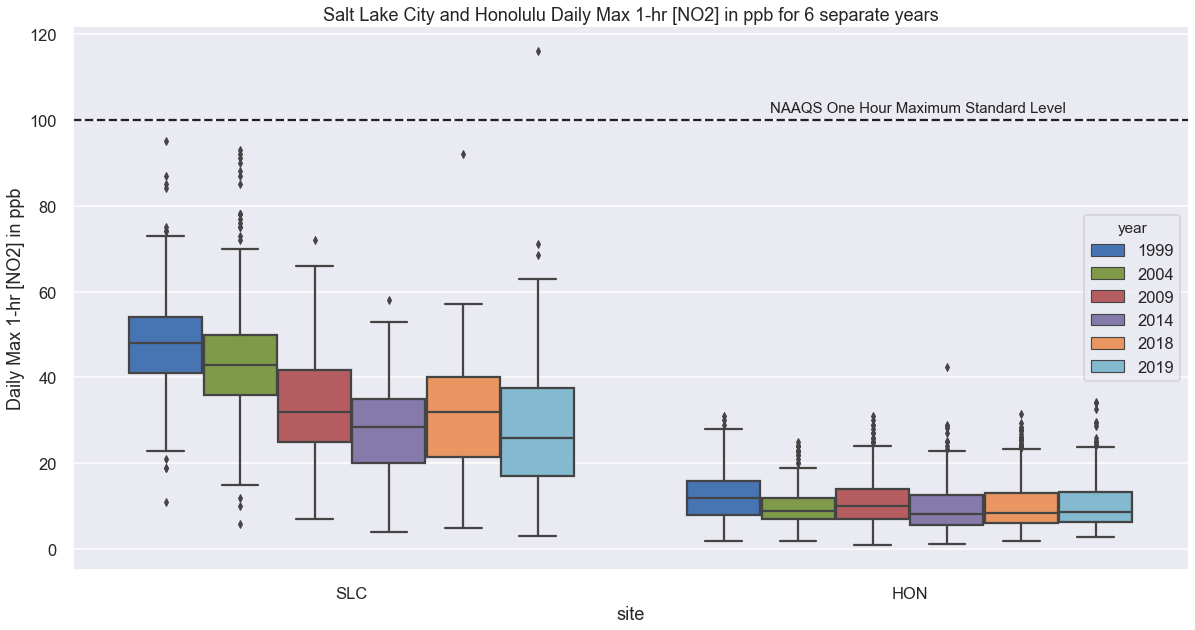

In [26]:
# Plot SLC and HON levels for all years
fig, axes = plt.subplots(1,1,figsize = (20, 10))
ax = sns.boxplot(y = pollutant_no2, x = 'site', data = df, hue = 'year')
ax.axhline(100, color = 'k', linestyle='dashed');
ax.set_title('Salt Lake City and Honolulu ' + pollutant_no2 + ' for 6 separate years');
style = dict(size=15, color='k');
ax.text(0.75, 102, "NAAQS One Hour Maximum Standard Level", **style);

#### Hypothesis 4: Salt Lake City NO2 analyzed by season over one year period (Autumn 2018 - Autumn 2019)

In [16]:
# Seasonal effects: first build a subset of data spanning autumn 2018 to autumn 2019 from master data frame
df_autumn18 = pd.DataFrame(df.loc[df['Date'].between('2018-09-01','2018-11-30')])
df_winter18 = pd.DataFrame(df.loc[df['Date'].between('2018-12-01','2019-02-28')])
df_spring19 = pd.DataFrame(df.loc[df['Date'].between('2019-03-01','2019-05-31')])
df_summer19 = pd.DataFrame(df.loc[df['Date'].between('2019-06-01','2019-08-31')])
df_autumn19 = pd.DataFrame(df.loc[df['Date'].between('2019-09-01','2019-11-30')])

df_autumn18['season'] = 'autumn 2018'
df_winter18['season'] = 'winter 2018'
df_spring19['season'] = 'spring 2019'
df_summer19['season'] = 'summer 2019'
df_autumn19['season'] = 'autumn 2019'

df_season = pd.concat([df_autumn18, df_winter18, df_spring19, df_summer19, df_autumn19])

,Date,Source,Site ID,POC,Daily Max 1-hr [NO2] in ppb,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,year,site
season,,,,,,,,,,,,,,,,,,,,,
autumn 2018,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
autumn 2019,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
spring 2019,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
summer 2019,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
winter 2018,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


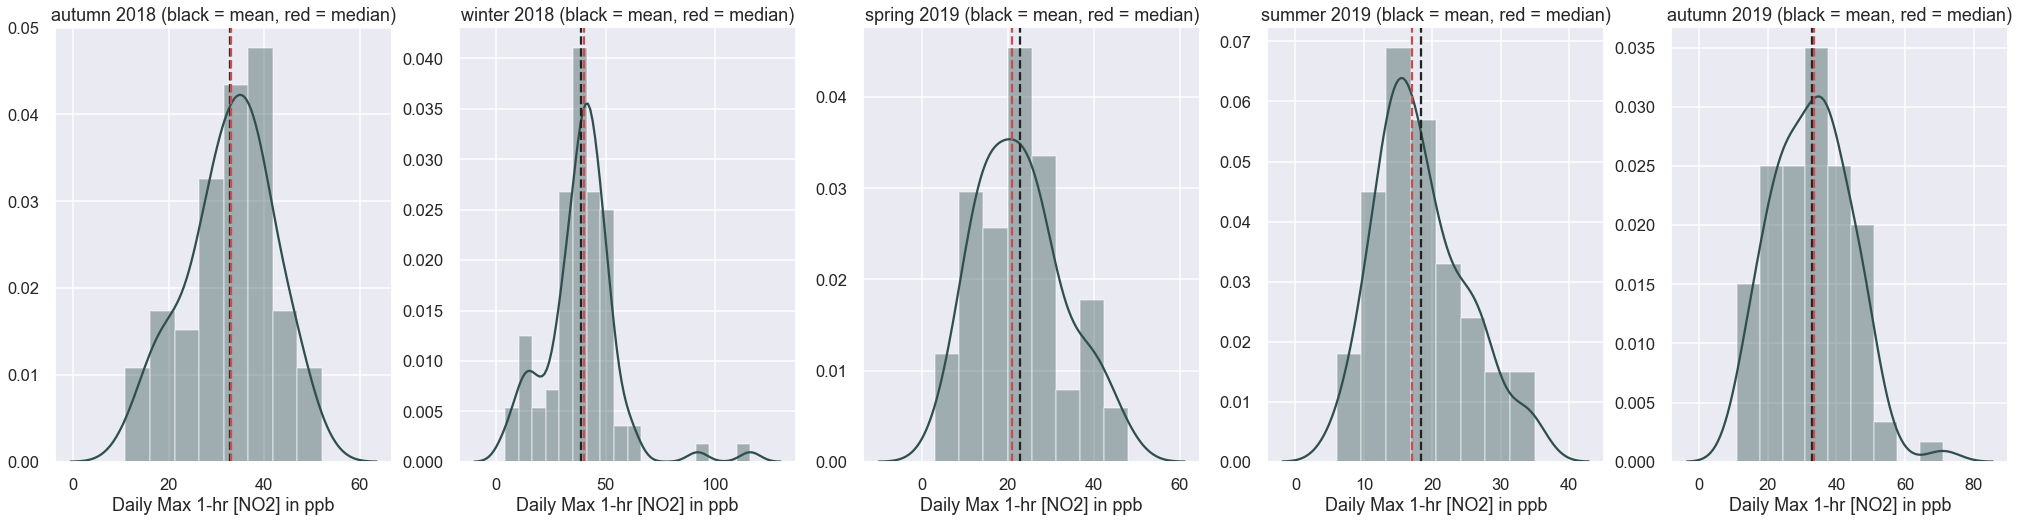

In [15]:
# Look at seasonal distribution for SLC
season_list = list(df_season['season'].unique())

ii = 0
fig, axes = plt.subplots(1,len(season_list), figsize=(35, 8))
while ii<len(season_list):
    ax = sns.distplot(df_season[(df_season['season']==season_list[ii])&(df_season['site']=='SLC')][pollutant_no2], ax=axes[ii], color = 'darkslategrey')
    ax.axvline(df_season[(df_season['season']==season_list[ii])&(df_season['site']=='SLC')][pollutant_no2].mean(), color = 'k', linestyle='dashed')
    ax.axvline(df_season[(df_season['season']==season_list[ii])&(df_season['site']=='SLC')][pollutant_no2].median(), color = 'r', linestyle='dashed')
    ax.set_title('%s (black = mean, red = median)' % str(season_list[ii]))
    ii +=1

df_season[df_season['site']=='SLC'].groupby(['season']).agg('count')

In [20]:
# Check normality for seasonal SLC distributions
[print('{} statistics: {}'.format(ii, stats.describe(df_season[(df_season['season']==ii)&(df_season['site']=='SLC')][pollutant_no2]))) for ii in season_list];
[print('{} Shapiro-Wilk: {}'.format(ii,  stats.shapiro(df_season[(df_season['season']==ii)&(df_season['site']=='SLC')][pollutant_no2]))) for ii in season_list];

autumn 2018 statistics: DescribeResult(nobs=90, minmax=(11.0, 52.0), mean=32.84444444444444, variance=82.31260923845194, skewness=-0.2949872467561231, kurtosis=-0.42406556624031655)
winter 2018 statistics: DescribeResult(nobs=90, minmax=(4.0, 116.0), mean=38.6, variance=263.97303370786517, skewness=1.1283426360787354, kurtosis=5.512044500592914)
spring 2019 statistics: DescribeResult(nobs=90, minmax=(3.0, 48.0), mean=22.8, variance=103.89213483146067, skewness=0.45093925124049145, kurtosis=-0.43049531241592565)
summer 2019 statistics: DescribeResult(nobs=92, minmax=(6.0, 35.0), mean=18.369565217391305, variance=43.33444816053512, skewness=0.5966166049219045, kurtosis=-0.15303071195833517)
autumn 2019 statistics: DescribeResult(nobs=90, minmax=(11.0, 71.0), mean=32.76555555555556, variance=125.98205867665418, skewness=0.335050311243749, kurtosis=0.1898065221355436)
autumn 2018 Shapiro-Wilk: (0.9821884632110596, 0.255461722612381)
winter 2018 Shapiro-Wilk: (0.8880961537361145, 1.23422705

In [18]:
# Seasonal statistics to compare SLC NO2 level throughout the year
print(stats.kruskal(df_season[(df_season['season']=='autumn 2018')&(df_season['site']=='SLC')][pollutant_no2],
                    df_season[(df_season['season']=='winter 2018')&(df_season['site']=='SLC')][pollutant_no2],
                    df_season[(df_season['season']=='spring 2019')&(df_season['site']=='SLC')][pollutant_no2],
                    df_season[(df_season['season']=='summer 2019')&(df_season['site']=='SLC')][pollutant_no2],
                    df_season[(df_season['season']=='autumn 2019')&(df_season['site']=='SLC')][pollutant_no2]))
print(stats.f_oneway(df_season[(df_season['season']=='autumn 2018')&(df_season['site']=='SLC')][pollutant_no2],
                     df_season[(df_season['season']=='winter 2018')&(df_season['site']=='SLC')][pollutant_no2],
                     df_season[(df_season['season']=='spring 2019')&(df_season['site']=='SLC')][pollutant_no2],
                     df_season[(df_season['season']=='summer 2019')&(df_season['site']=='SLC')][pollutant_no2],
                     df_season[(df_season['season']=='autumn 2019')&(df_season['site']=='SLC')][pollutant_no2]))
[print('{} SLC seasonal NO2 median: {}'.format(ii, df_season[(df_season['season']==ii)&(df_season['site']=='SLC')][pollutant_no2].median())) for ii in season_list];

KruskalResult(statistic=153.25209360523547, pvalue=4.090139997695802e-32)
F_onewayResult(statistic=50.09884307093192, pvalue=7.826293416605752e-35)
autumn 2018 SLC seasonal NO2 median: 33.0
winter 2018 SLC seasonal NO2 median: 40.0
spring 2019 SLC seasonal NO2 median: 21.0
summer 2019 SLC seasonal NO2 median: 17.0
autumn 2019 SLC seasonal NO2 median: 33.4


#### Hypothesis 5: Honolulu NO2 analyzed by season over one year period (Autumn 2018 - Autumn 2019)

,Date,Source,Site ID,POC,Daily Max 1-hr [NO2] in ppb,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,year,site
season,,,,,,,,,,,,,,,,,,,,,
autumn 2018,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
autumn 2019,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
spring 2019,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
summer 2019,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
winter 2018,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


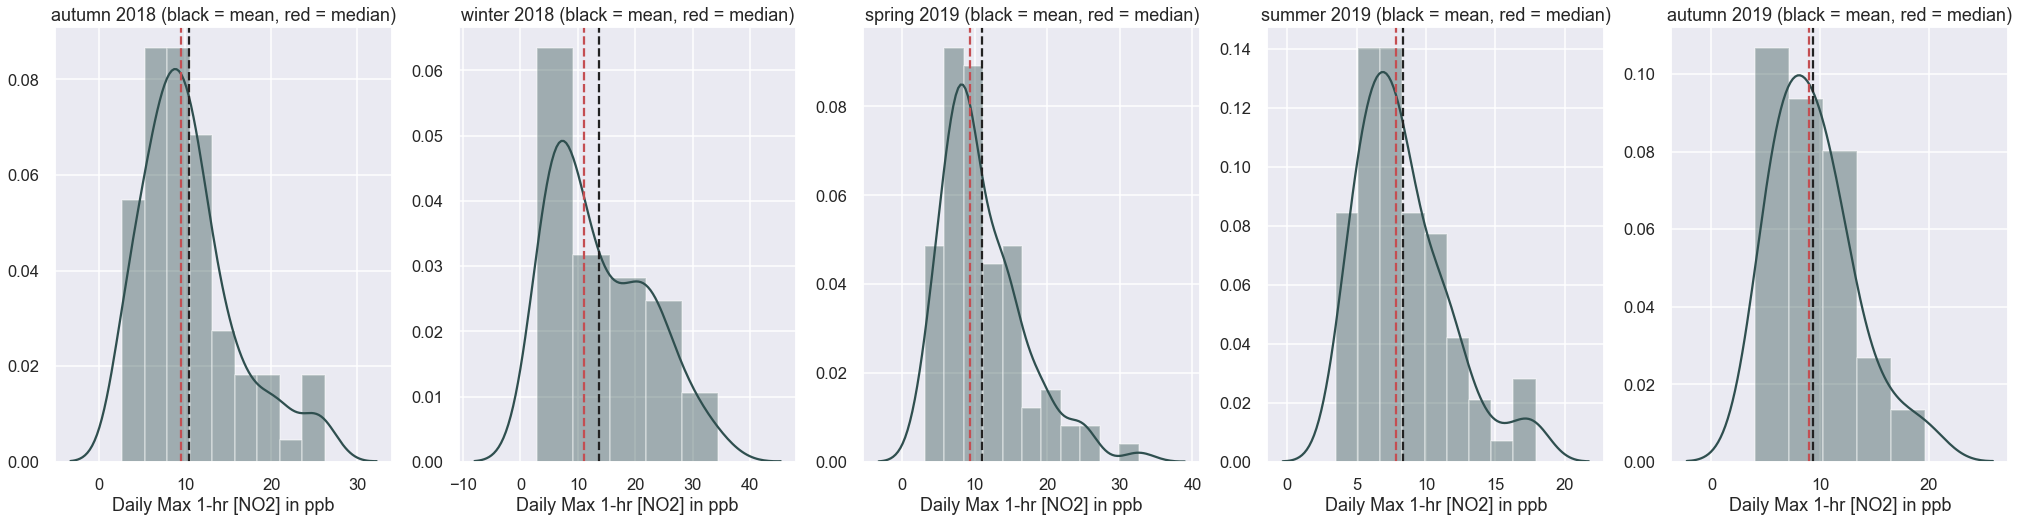

In [21]:
# Look at seasonal distribution for HON
season_list = list(df_season['season'].unique())

ii = 0
fig, axes = plt.subplots(1,len(season_list), figsize=(35, 8))
while ii<len(season_list):
    ax = sns.distplot(df_season[(df_season['season']==season_list[ii])&(df_season['site']=='HON')][pollutant_no2], ax=axes[ii], color = 'darkslategrey')
    ax.axvline(df_season[(df_season['season']==season_list[ii])&(df_season['site']=='HON')][pollutant_no2].mean(), color = 'k', linestyle='dashed')
    ax.axvline(df_season[(df_season['season']==season_list[ii])&(df_season['site']=='HON')][pollutant_no2].median(), color = 'r', linestyle='dashed')
    ax.set_title('%s (black = mean, red = median)' % str(season_list[ii]))
    ii +=1

df_season[df_season['site']=='HON'].groupby(['season']).agg('count')

In [22]:
# Check normality for seasonal HON distributions
[print('{} statistics: {}'.format(ii, stats.describe(df_season[(df_season['season']==ii)&(df_season['site']=='SLC')][pollutant_no2]))) for ii in season_list];
[print('{} Shapiro-Wilk: {}'.format(ii,  stats.shapiro(df_season[(df_season['season']==ii)&(df_season['site']=='SLC')][pollutant_no2]))) for ii in season_list];

autumn 2018 statistics: DescribeResult(nobs=90, minmax=(11.0, 52.0), mean=32.84444444444444, variance=82.31260923845194, skewness=-0.2949872467561231, kurtosis=-0.42406556624031655)
winter 2018 statistics: DescribeResult(nobs=90, minmax=(4.0, 116.0), mean=38.6, variance=263.97303370786517, skewness=1.1283426360787354, kurtosis=5.512044500592914)
spring 2019 statistics: DescribeResult(nobs=90, minmax=(3.0, 48.0), mean=22.8, variance=103.89213483146067, skewness=0.45093925124049145, kurtosis=-0.43049531241592565)
summer 2019 statistics: DescribeResult(nobs=92, minmax=(6.0, 35.0), mean=18.369565217391305, variance=43.33444816053512, skewness=0.5966166049219045, kurtosis=-0.15303071195833517)
autumn 2019 statistics: DescribeResult(nobs=90, minmax=(11.0, 71.0), mean=32.76555555555556, variance=125.98205867665418, skewness=0.335050311243749, kurtosis=0.1898065221355436)
autumn 2018 Shapiro-Wilk: (0.9821884632110596, 0.255461722612381)
winter 2018 Shapiro-Wilk: (0.8880961537361145, 1.23422705

In [23]:
# Seasonal statistics to compare HON NO2 level throughout the year
print(stats.kruskal(df_season[(df_season['season']=='autumn 2018')&(df_season['site']=='HON')][pollutant_no2],
                    df_season[(df_season['season']=='winter 2018')&(df_season['site']=='HON')][pollutant_no2],
                    df_season[(df_season['season']=='spring 2019')&(df_season['site']=='HON')][pollutant_no2],
                    df_season[(df_season['season']=='summer 2019')&(df_season['site']=='HON')][pollutant_no2],
                    df_season[(df_season['season']=='autumn 2019')&(df_season['site']=='HON')][pollutant_no2]))
print(stats.f_oneway(df_season[(df_season['season']=='autumn 2018')&(df_season['site']=='HON')][pollutant_no2],
                     df_season[(df_season['season']=='winter 2018')&(df_season['site']=='HON')][pollutant_no2],
                     df_season[(df_season['season']=='spring 2019')&(df_season['site']=='HON')][pollutant_no2],
                     df_season[(df_season['season']=='summer 2019')&(df_season['site']=='HON')][pollutant_no2],
                     df_season[(df_season['season']=='autumn 2019')&(df_season['site']=='HON')][pollutant_no2]))
[print('{} Honolulu seasonal NO2 median: {}'.format(ii, df_season[(df_season['season']==ii)&(df_season['site']=='HON')][pollutant_no2].median())) for ii in season_list];

KruskalResult(statistic=19.913951807291113, pvalue=0.0005193151771354931)
F_onewayResult(statistic=9.734476602206508, pvalue=1.6858810155893343e-07)
autumn 2018 Honolulu seasonal NO2 median: 9.5
winter 2018 Honolulu seasonal NO2 median: 11.1
spring 2019 Honolulu seasonal NO2 median: 9.4
summer 2019 Honolulu seasonal NO2 median: 7.8
autumn 2019 Honolulu seasonal NO2 median: 8.95


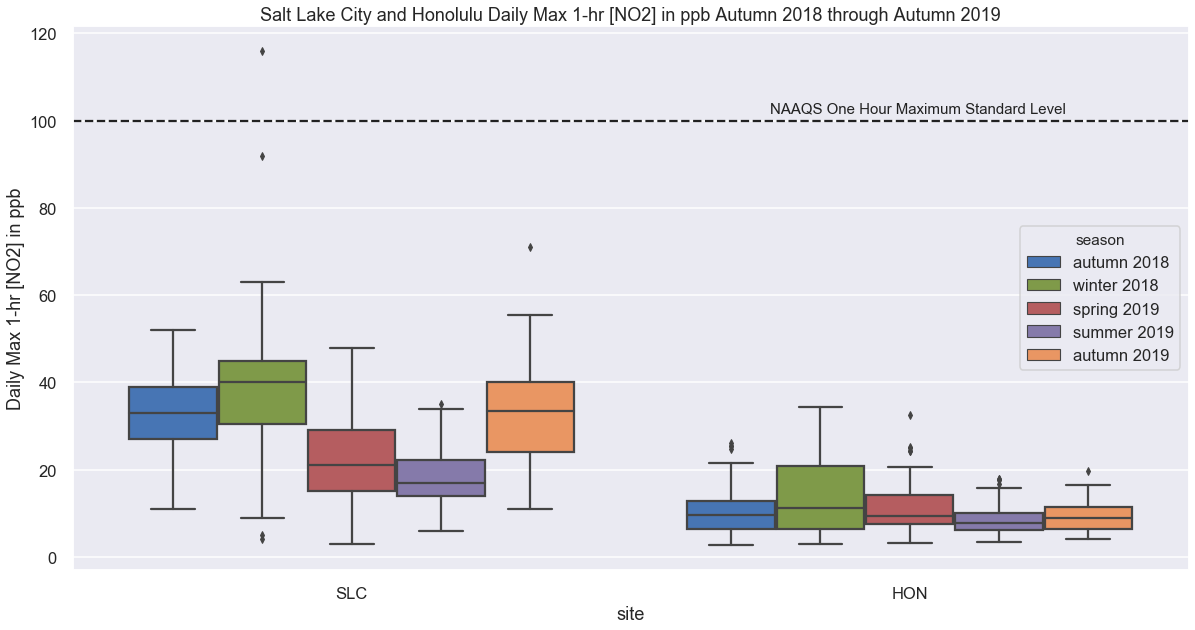

In [24]:
fig, axes = plt.subplots(1,1,figsize = (20, 10))
ax = sns.boxplot(y = pollutant_no2, x = 'site', data = df_season, hue = 'season')
ax.axhline(100, color = 'k', linestyle='dashed');
ax.set_title('Salt Lake City and Honolulu ' + pollutant_no2 + ' Autumn 2018 through Autumn 2019');
style = dict(size=15, color='k');
ax.text(0.75, 102, "NAAQS One Hour Maximum Standard Level", **style);